# This will be an analysis of Regional Mexican Group Banda MS

# Motivating Questions
## 1. Which albums have been most successful?
## 2. Does Danceability and Fast Tempo lead to success?
## 3. Which themes are most touched upon by Banda MS

In [1]:
#Import neccessary Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
#importing the data
df_banda_ms=pd.read_csv('banda_ms.csv',encoding='latin1')

#Inspect Column Data types
df_banda_ms.info()

#Inspecting to see if the data
#Note-Data was gathered using the Spotipy API and narrowed down to one band.
df_banda_ms.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 25 columns):
ID                  42 non-null object
Song_Name           42 non-null object
Artist              42 non-null object
Popularity_Score    42 non-null int64
Album_name          42 non-null object
Release_Date        42 non-null object
danceability        42 non-null float64
energy              42 non-null float64
key                 42 non-null int64
loudness            42 non-null float64
mode                42 non-null int64
speechiness         42 non-null float64
acousticness        42 non-null float64
instrumentalness    42 non-null float64
liveness            42 non-null float64
valence             42 non-null float64
tempo               42 non-null float64
type                42 non-null object
id                  42 non-null object
uri                 42 non-null object
track_href          42 non-null object
analysis_url        42 non-null object
duration_ms         42 non-null i

,ID,Song_Name,Artist,Popularity_Score,Album_name,Release_Date,danceability,energy,key,loudness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,lyrics
0,1l77YWrGUp3qX3NS1rz7lq,El Color de Tus Ojos,Banda Sinaloense MS de Sergio LizÃ¡rraga,74,La Mejor VersiÃ³n De MÃ­,4/21/2017,0.765,0.339,8,-8.965,...,0.864,123.950,audio_features,1l77YWrGUp3qX3NS1rz7lq,spotify:track:1l77YWrGUp3qX3NS1rz7lq,https://api.spotify.com/v1/tracks/1l77YWrGUp3q...,https://api.spotify.com/v1/audio-analysis/1l77...,202560,4,El color de tus ojos\nDespertó mi interés\nY s...
1,2yS8aYWXEWJ1NlZ7VPDroT,Me Vas a ExtraÃ±ar,Banda Sinaloense MS de Sergio LizÃ¡rraga,72,Que BendiciÃ³n,2/5/2016,0.756,0.526,8,-5.379,...,0.940,144.942,audio_features,2yS8aYWXEWJ1NlZ7VPDroT,spotify:track:2yS8aYWXEWJ1NlZ7VPDroT,https://api.spotify.com/v1/tracks/2yS8aYWXEWJ1...,https://api.spotify.com/v1/audio-analysis/2yS8...,176800,3,Los besos de mi boca\nNo fueron suficientes\nP...
2,1O18MtSAMUk7JfAVB8gGzs,HÃ¡blame De Ti,Banda Sinaloense MS de Sergio LizÃ¡rraga,71,No Me Pidas PerdÃ³n,6/24/2014,0.781,0.553,5,-4.598,...,0.832,145.060,audio_features,1O18MtSAMUk7JfAVB8gGzs,spotify:track:1O18MtSAMUk7JfAVB8gGzs,https://api.spotify.com/v1/tracks/1O18MtSAMUk7...,https://api.spotify.com/v1/audio-analysis/1O18...,190773,3,"Me dijiste ""hola"" con una sonrisa\nPor cierto,..."
3,3mV5TTtHnXUeOzRkyFKsVl,Por Mi No Te Detengas,Banda Sinaloense MS de Sergio LizÃ¡rraga,73,Con Todas Las Fuerzas,9/14/2018,0.649,0.307,5,-7.209,...,0.713,74.833,audio_features,3mV5TTtHnXUeOzRkyFKsVl,spotify:track:3mV5TTtHnXUeOzRkyFKsVl,https://api.spotify.com/v1/tracks/3mV5TTtHnXUe...,https://api.spotify.com/v1/audio-analysis/3mV5...,225213,4,No te vas\nPorque no te conviene\nComo yo te h...
4,7EY91l11hOnYIytcxFgvDN,No Elegi Conocerte,Banda Sinaloense MS de Sergio LizÃ¡rraga,72,Con Todas Las Fuerzas,9/14/2018,0.860,0.400,2,-7.131,...,0.813,129.925,audio_features,7EY91l11hOnYIytcxFgvDN,spotify:track:7EY91l11hOnYIytcxFgvDN,https://api.spotify.com/v1/tracks/7EY91l11hOnY...,https://api.spotify.com/v1/audio-analysis/7EY9...,254853,4,No elegí conocerte\nFue cuestión de mala suert...


# 1. Which Albums have been most Successful

Text(0.5, 1.0, 'Banda MS Popularity from 2009-2020')

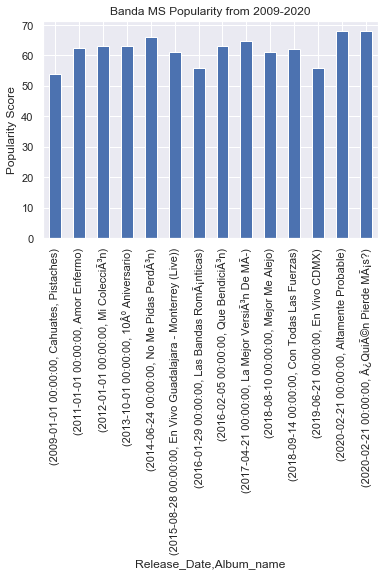

In [7]:
#Set plotting style and magic keyword
sns.set()
%matplotlib inline
#Change one of my variables to datetime from float
df_banda_ms.Release_Date = pd.to_datetime(df_banda_ms.Release_Date)

#Group my data by Day that Album was released as well as by Album name
df_ms_alb = df_banda_ms.groupby(['Release_Date','Album_name']).mean()

#Plot my data plus add a title
df_ms_alb.Popularity_Score.plot(kind='bar')
plt.ylabel('Popularity Score')
plt.title('Banda MS Popularity from 2009-2020')

# 2. Does Danceability and Fast Tempo lead to popularity?

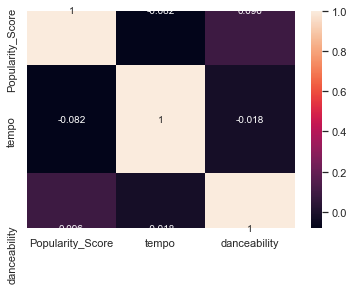

In [14]:
#Correlation Matrix to test both of these
df_subset= df_banda_ms[['Popularity_Score','tempo','danceability']]
sns.heatmap(df_subset.corr(),annot=True)

#Note very low correlation and there seems to be no evidence to back it up.

Text(0.5, 1, 'Relationship Between Tempo and Popularity Score')

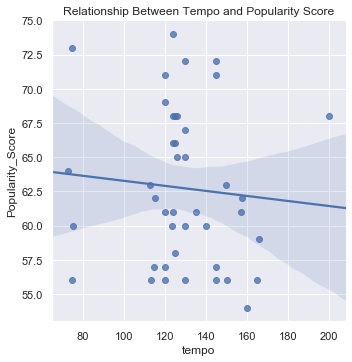

In [10]:
#Visualization on Correlation Matrix
#Plot
sns.lmplot(x='tempo',y='Popularity_Score',data=df_banda_ms)
plt.xlabel('Tempo(Beats Per Minute)')
plt.ylabel('Popularity Score')
plt.title("Relationship Between Tempo and Popularity Score")

Text(0.5, 1, 'Relationship Between Danceability and Popularity Score')

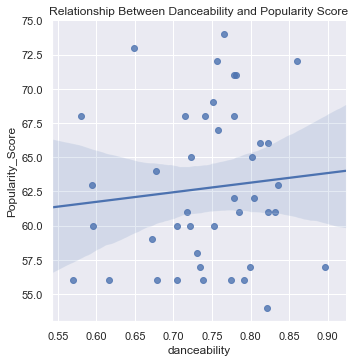

In [12]:
#Visualization on popularity score
#Scatter Plot
sns.lmplot(x='danceability',y='Popularity_Score',data=df_banda_ms)
plt.title("Relationship Between Danceability and Popularity Score")

# 3. Which themes does Banda MS sing about?

In [15]:
#Load visual and textual Libraries
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [18]:
#Load in all of my text from the Lyrics column.
text = " ".join(review for review in df_banda_ms.lyrics)
print ("There are {} words 43 songs from Banda MS.".format(len(text)))

#Load my stop words for the spanish Language.
spanish_words = pd.read_csv('stop_words.txt', sep=" ", header=None,encoding='latin1')
print(spanish_words)

# set stop words 
stopwords = set(STOPWORDS)
stopwords.update(spanish_words[0])

There are 46467 words 43 songs from Banda MS.
           0
0          a
1         al
2       algo
3    algunas
4    algunos
..       ...
311       sé
312      voy
313       va
314      vez
315       di

[316 rows x 1 columns]


In [20]:
#Open up Banda Ms logo for a template
ms_logo = np.array(Image.open("banda_ms_logo.png"))
ms_logo

array([[[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       ...,

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255

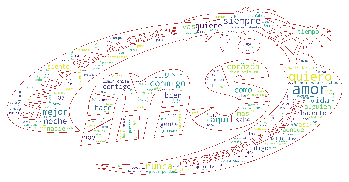

In [21]:
#WordCloud object with parameters
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white",
                      mask=ms_logo,
                      contour_width=3,
                      contour_color='firebrick').generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='nearest',resample=True)
plt.axis("off")
plt.show()

# Conclusion
From what was observed, I see that Banda MS focuses on romantic themes and have acquired popularity in this space. It would be interesting to look at demographic data to see who the target audience is that has made them grow in popularity. They are at the point to which they were one of the first Mexican Bandas to play at a major concert like Coachella.This is the first step in a 3 step process of analyzing musical data in the domain of Mexican Regional Music. The next part will be to apply statistical model to attempt and answer the question of success in music. Stay tuned for more!